# Loading the Data

In [10]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.Resize((64, 64)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean = [0.5, 0.5, 0.5], std = [0.5, 0.5, 0.5])
                               ])

In [11]:
training_dataset = datasets.ImageFolder(root='data/train', transform=transform)

In [12]:
training_dataset.classes

['Accident', 'Non Accident']

In [13]:
validation_dataset = datasets.ImageFolder(root='data/val', transform=transform)
test_dataset = datasets.ImageFolder(root='data/test', transform=transform)

In [14]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [15]:
batch = next(iter(train_loader))
images,labels = batch
print(images.shape, labels.shape)

torch.Size([64, 3, 64, 64]) torch.Size([64])


# Visualizing Images

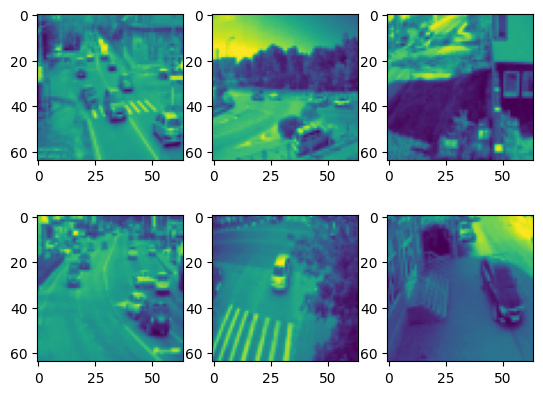

In [16]:
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i][0])
plt.show()

# Convolutional Neural Network

In [17]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # output: 32 x 16 x 16
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # output: 64 x 8 x 8
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # output: 128 x 4 x 4
            nn.Flatten(),
            nn.Linear(128*4*4, 1024),  # Updated linear layer input size
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )

    def forward(self, X):
        return self.network(X)


# Training

In [18]:
model = CNNModel()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
num_epochs = 20

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

for epoch in range(num_epochs):
    for batch in train_loader:
        #forward pass
        inputs, labels = batch
        outputs = model(inputs)
        l = loss(outputs, labels)
        #backward pass
        l.backward()
        #weight update
        optimizer.step()
        optimizer.zero_grad()
    
    batch_acc = []
    for batch in val_loader:
        inputs, labels = batch
        outputs = model(inputs)
        acc = accuracy(outputs, labels)
        batch_acc.append(acc)
    epoch_acc = torch.stack(batch_acc).mean()
    print(f"Epoch [{epoch}], Model Accuracy: {epoch_acc.item():.4f}")

Epoch [0], Model Accuracy: 0.6406
Epoch [1], Model Accuracy: 0.7050
Epoch [2], Model Accuracy: 0.7096
Epoch [3], Model Accuracy: 0.7224
Epoch [4], Model Accuracy: 0.7004
Epoch [5], Model Accuracy: 0.8474
Epoch [6], Model Accuracy: 0.8709
Epoch [7], Model Accuracy: 0.7904
Epoch [8], Model Accuracy: 0.8130
Epoch [9], Model Accuracy: 0.8778
Epoch [10], Model Accuracy: 0.9315
Epoch [11], Model Accuracy: 0.8952
Epoch [12], Model Accuracy: 0.8865
Epoch [13], Model Accuracy: 0.9168
Epoch [14], Model Accuracy: 0.8883
Epoch [15], Model Accuracy: 0.8874
Epoch [16], Model Accuracy: 0.8433
Epoch [17], Model Accuracy: 0.8805
Epoch [18], Model Accuracy: 0.8442
Epoch [19], Model Accuracy: 0.9030
